In [2]:
import sys
import json
import numpy as np
import pandas as pd
import time
import cv2
from sklearn.preprocessing import LabelEncoder

In [3]:
class SVM:
    def __init__(self, json_both, json_onlyleft, json_onlyright, json_radio, json_drinking, json_reachside):
        self.both_j = json_both
        self.onlyleft_j = json_onlyleft
        self.onlyright_j = json_onlyright
        self.radio_j = json_radio
        self.drinking_j = json_drinking
        self.reachside_j = json_reachside

        self.both = []
        self.onlyleft = []
        self.onlyright = []
        self.radio = []
        self.drinking = []
        self.reachside = []

        self.rows = []

    def open_jsons(self):

        try:
            with open(self.both_j, 'r', encoding='utf-8-sig') as f:
                self.both = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.both_j}. Trying alternative encoding...")
            with open(self.both_j, 'r', encoding='latin-1') as f:
                self.both = json.load(f)

        try:
            with open(self.onlyleft_j, 'r', encoding='utf-8-sig') as f:
                self.onlyleft = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyleft_j}. Trying alternative encoding...")
            with open(self.onlyleft_j, 'r', encoding='latin-1') as f:
                self.onlyleft = json.load(f)

        try:
            with open(self.onlyright_j, 'r', encoding='utf-8-sig') as f:
                self.onlyright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyright_j}. Trying alternative encoding...")
            with open(self.onlyright_j, 'r', encoding='latin-1') as f:
                self.onlyright = json.load(f)

        try:
            with open(self.radio_j, 'r', encoding='utf-8-sig') as f:
                self.radio = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.radio_j}. Trying alternative encoding...")
            with open(self.radio_j, 'r', encoding='latin-1') as f:
                self.radio = json.load(f)

        try:
            with open(self.drinking_j, 'r', encoding='utf-8-sig') as f:
                self.drinking = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.drinking_j}. Trying alternative encoding...")
            with open(self.drinking_j, 'r', encoding='latin-1') as f:
                self.drinking = json.load(f)

        try:
            with open(self.reachside_j, 'r', encoding='utf-8-sig') as f:
                self.reachside = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.reachside_j}. Trying alternative encoding...")
            with open(self.reachside_j, 'r', encoding='latin-1') as f:
                self.reachside = json.load(f)


    def prepare_data(self, data):

        for item in data:

            features = {
                "center_left_x": item['pose']['pose'][50][0],
                "center_left_y": item['pose']['pose'][50][1],
                "center_right_x": item['pose']['pose'][51][0],
                "center_right_y": item['pose']['pose'][51][1],
                "pose_0_x": item['pose']['pose'][0][0],
                "pose_0_y": item['pose']['pose'][0][1],
                "pose_1_x": item['pose']['pose'][1][0],
                "pose_1_y": item['pose']['pose'][1][1],
                "pose_2_x": item['pose']['pose'][2][0],
                "pose_2_y": item['pose']['pose'][2][1],
                "pose_3_x": item['pose']['pose'][3][0],
                "pose_3_y": item['pose']['pose'][3][1],
                "pose_4_x": item['pose']['pose'][4][0],
                "pose_4_y": item['pose']['pose'][4][1],
                "pose_5_x": item['pose']['pose'][5][0],
                "pose_5_y": item['pose']['pose'][5][1],
                # "json": item['json'],
                # "frame": item['frame'],
                "label": item['type'] # cambiar el label
            }
            
            self.rows.append(features)


In [4]:
json_files = [  '/home/arantxa/universidad/TFG/src/bal_data_5_frames/hands_using_wheel_both.json', 
                '/home/arantxa/universidad/TFG/src/bal_data_5_frames/hands_using_wheel_only_left.json', 
                '/home/arantxa/universidad/TFG/src/bal_data_5_frames/hands_using_wheel_only_right.json',
                '/home/arantxa/universidad/TFG/src/bal_data_5_frames/driver_actions_radio.json', 
                '/home/arantxa/universidad/TFG/src/bal_data_5_frames/driver_actions_drinking.json', 
                '/home/arantxa/universidad/TFG/src/bal_data_5_frames/driver_actions_reach_side.json']

        
SVM_performer = SVM(*json_files)
SVM_performer.open_jsons()
SVM_performer.prepare_data(SVM_performer.both)
SVM_performer.prepare_data(SVM_performer.onlyleft)
SVM_performer.prepare_data(SVM_performer.onlyright)
SVM_performer.prepare_data(SVM_performer.radio)
SVM_performer.prepare_data(SVM_performer.drinking)
SVM_performer.prepare_data(SVM_performer.reachside)

dataset = pd.DataFrame(SVM_performer.rows)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742530       0.621325        0.690298        0.318795  0.373532   
2          0.742516       0.620976        0.688865        0.321779  0.374417   
3          0.743092       0.618812        0.691405        0.321950  0.374299   
4          0.743656       0.617980        0.691043        0.324544  0.375650   
...             ...            ...             ...             ...       ...   
6495       0.539505       0.693151        0.635384        0.403096  0.291264   
6496       0.540554       0.665927        0.635993        0.401935  0.295736   
6497       0.546753       0.643619        0.635764        0.404987  0.296727   
6498       0.549881       0.620073        0.635204        0.404464  0.297613   
6499       0.555301       0.605927        0.636885        0.399099  0.297987   

      pose_0_y  pose_1_x  pose_1_y  pos

In [5]:
dataset['label'] = dataset['label'].replace("hands_using_wheel/both", 0)
dataset['label'] = dataset['label'].replace("hands_using_wheel/only_left", 1)
dataset['label'] = dataset['label'].replace("hands_using_wheel/only_right", 2)
dataset['label'] = dataset['label'].replace("driver_actions/radio", 3)
dataset['label'] = dataset['label'].replace("driver_actions/drinking", 4)
dataset['label'] = dataset['label'].replace("driver_actions/reach_side", 5)

In [6]:
dataset_multilabel = pd.get_dummies(dataset['label'], prefix='class').astype(int)

dataset = pd.concat([dataset, dataset_multilabel], axis=1)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742530       0.621325        0.690298        0.318795  0.373532   
2          0.742516       0.620976        0.688865        0.321779  0.374417   
3          0.743092       0.618812        0.691405        0.321950  0.374299   
4          0.743656       0.617980        0.691043        0.324544  0.375650   
...             ...            ...             ...             ...       ...   
6495       0.539505       0.693151        0.635384        0.403096  0.291264   
6496       0.540554       0.665927        0.635993        0.401935  0.295736   
6497       0.546753       0.643619        0.635764        0.404987  0.296727   
6498       0.549881       0.620073        0.635204        0.404464  0.297613   
6499       0.555301       0.605927        0.636885        0.399099  0.297987   

      pose_0_y  pose_1_x  pose_1_y  pos

In [7]:
print(dataset[['class_3', 'class_4', 'class_5', 'center_left_x', 'center_left_y']].head())


   class_3  class_4  class_5  center_left_x  center_left_y
0        0        0        0       0.743550       0.619071
1        0        0        0       0.742530       0.621325
2        0        0        0       0.742516       0.620976
3        0        0        0       0.743092       0.618812
4        0        0        0       0.743656       0.617980


In [8]:
c = 0
# Buscamos las filas que tengan la clase 3, 4 o 5 y que tengan valores distintos de 0 en las columnas center_left_x y center_left_y
for index, row in dataset.iterrows():
    for class_col in ['class_3', 'class_4', 'class_5']:
        if row[class_col] == 1 and row['center_left_x'] != 0 and row['center_left_y'] != 0:
            c += 1
            dataset.loc[index, 'class_1'] = 1  # Modificar el dataset directamente

print(c)


3000


In [9]:
# Lista de columnas que quieres combinar
class_columns = [f'class_{i}' for i in range(6)]

# Crear la nueva columna 'multilabel' como una lista de valores de las columnas especificadas
dataset['multilabel'] = dataset[class_columns].apply(lambda row: row.tolist(), axis=1)

# Eliminar las columnas originales si ya no son necesarias
dataset = dataset.drop(columns=class_columns)
dataset = dataset.drop(columns=['label'])

print(dataset)


      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742530       0.621325        0.690298        0.318795  0.373532   
2          0.742516       0.620976        0.688865        0.321779  0.374417   
3          0.743092       0.618812        0.691405        0.321950  0.374299   
4          0.743656       0.617980        0.691043        0.324544  0.375650   
...             ...            ...             ...             ...       ...   
6495       0.539505       0.693151        0.635384        0.403096  0.291264   
6496       0.540554       0.665927        0.635993        0.401935  0.295736   
6497       0.546753       0.643619        0.635764        0.404987  0.296727   
6498       0.549881       0.620073        0.635204        0.404464  0.297613   
6499       0.555301       0.605927        0.636885        0.399099  0.297987   

      pose_0_y  pose_1_x  pose_1_y  pos

In [10]:
cols_to_group = dataset.columns.difference(["multilabel"])
grouped = dataset.groupby(list(cols_to_group))["multilabel"].apply(
    lambda x: [int(any(values)) for values in zip(*x)]
).reset_index()

dataset = grouped

# for _, row in grouped.iterrows():
#     multilabel = row["multilabel"]
#     if sum(multilabel) > 1:  
#         print(f"Fila agrupada: {row.to_dict()}")

# -----------------------------------------------------
# salia que había 44 iguales (o sea 22 menos)
# -----------------------------------------------------

In [11]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1] # todo menos etiquetas
Y = dataset.iloc[:, -1] # etiquetas

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size=0.25, random_state=1, stratify=Y) 


In [12]:
train_class_counts = pd.Series(Y_train).value_counts()

test_class_counts = pd.Series(Y_test).value_counts()

print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_counts)

print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_counts)

Distribución de clases en el conjunto de entrenamiento:
multilabel
[1, 0, 0, 0, 0, 0]    1125
[0, 1, 0, 0, 1, 0]     750
[0, 1, 0, 1, 0, 0]     750
[0, 1, 0, 0, 0, 0]     748
[0, 0, 1, 0, 0, 0]     739
[0, 1, 0, 0, 0, 1]     739
[0, 1, 1, 0, 0, 1]      11
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
multilabel
[1, 0, 0, 0, 0, 0]    375
[0, 1, 0, 0, 1, 0]    250
[0, 1, 0, 1, 0, 0]    250
[0, 1, 0, 0, 0, 0]    249
[0, 1, 0, 0, 0, 1]    247
[0, 0, 1, 0, 0, 0]    247
[0, 1, 1, 0, 0, 1]      3
Name: count, dtype: int64


In [13]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Y_train_bin = np.array(list(Y_train)) 
Y_test_bin = np.array(list(Y_test)) 

print("Formato de Y_train_bin:", Y_train_bin.shape)

multilabel_model = OneVsRestClassifier(SVC(kernel="linear", random_state=1))
multilabel_model.fit(X_train, Y_train_bin)

Y_pred_multilabel = multilabel_model.predict(X_test)
Y_train_pred = multilabel_model.predict(X_train)

print("Predicciones multilabel (primeras 5 filas):\n", Y_pred_multilabel[:5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_train_bin, Y_train_pred)
print("Precisión (entrenamiento):", accuracy)

accuracy = accuracy_score(Y_test_bin, Y_pred_multilabel)
print("Precisión:", accuracy)

Formato de Y_train_bin: (4862, 6)
Predicciones multilabel (primeras 5 filas):
 [[1 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]
Accuracy (entrenamiento): 0.6795557383792677
Accuracy: 0.6921653300431833


Número de ejemplos sin predicciones: 439
Número de ejemplos con predicciones: 6684


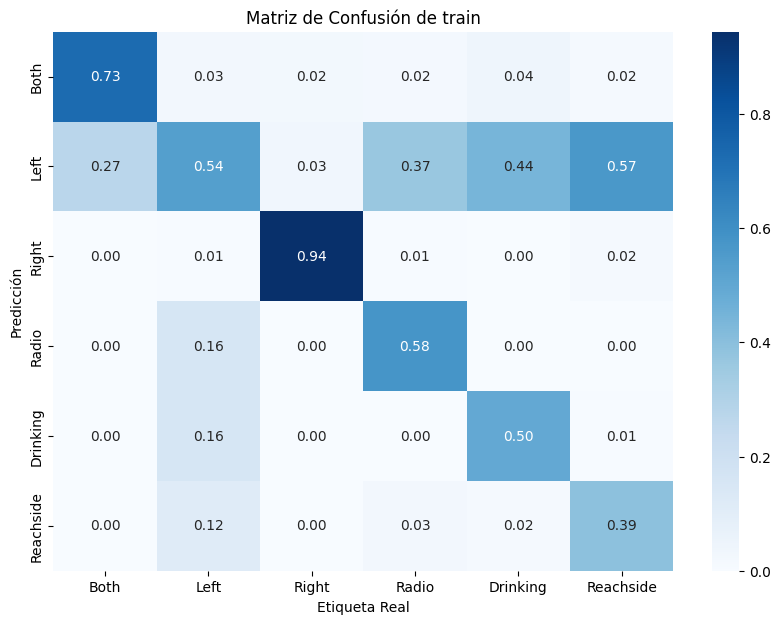

Número de ejemplos sin predicciones: 128
Número de ejemplos con predicciones: 2246


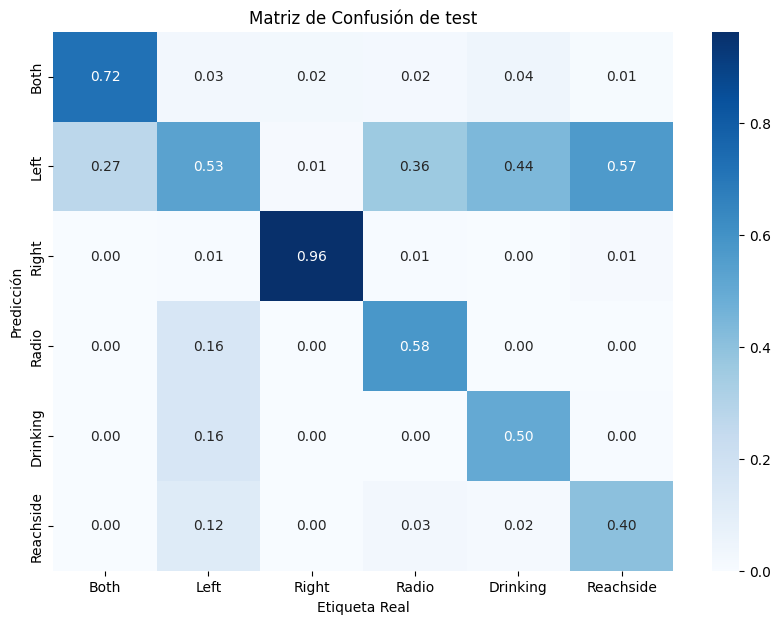

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Both', 'Left', 'Right', 'Radio', 'Drinking', 'Reachside']

n_labels = Y_train_bin.shape[1]

global_conf_matrix = np.zeros((n_labels, n_labels))

no_predictions_train = 0
yes_predictions_train = 0

for i in range(Y_train_bin.shape[0]): 
    for j in range(n_labels): 
        if Y_train_bin[i, j] == 1: 
            for k in range(n_labels):  
                global_conf_matrix[j, k] += Y_train_pred[i, k]  

            if np.sum(Y_train_pred[i]) == 0:
                no_predictions_train += 1
            else:
                yes_predictions_train += 1

print(f"Número de ejemplos sin predicciones: {no_predictions_train}")
print(f"Número de ejemplos con predicciones: {yes_predictions_train}")

row_sums = global_conf_matrix.sum(axis=1, keepdims=True) 
global_conf_matrix_normalized = global_conf_matrix / row_sums

plt.figure(figsize=(10, 7))
sns.heatmap(global_conf_matrix_normalized.T, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels, 
            yticklabels=class_labels)  
plt.xlabel("Etiqueta Real")
plt.ylabel("Predicción")
plt.title("Matriz de Confusión de train")
plt.show()

global_conf_matrix = np.zeros((n_labels, n_labels))

no_predictions_test = 0
yes_predictions_test = 0

for i in range(Y_test_bin.shape[0]): 
    for j in range(n_labels): 
        if Y_test_bin[i, j] == 1: 
            for k in range(n_labels):  
                global_conf_matrix[j, k] += Y_pred_multilabel[i, k]  
            
            if np.sum(Y_pred_multilabel[i]) == 0:
                no_predictions_test += 1
            else:
                yes_predictions_test += 1

print(f"Número de ejemplos sin predicciones: {no_predictions_test}")
print(f"Número de ejemplos con predicciones: {yes_predictions_test}")
            
row_sums = global_conf_matrix.sum(axis=1, keepdims=True) 
global_conf_matrix_normalized = global_conf_matrix / row_sums

plt.figure(figsize=(10, 7))
sns.heatmap(global_conf_matrix_normalized.T, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels,  
            yticklabels=class_labels)  
plt.xlabel("Etiqueta Real")
plt.ylabel("Predicción")
plt.title("Matriz de Confusión de test")
plt.show()
